In [13]:
import scipy
%matplotlib inline

In [14]:
from vzam import *

In [15]:
IMAGES_DIR = 'test_images'

In [16]:
fnames = [os.path.join(IMAGES_DIR, fname) for fname in os.listdir(IMAGES_DIR)]
imnames = [fname for fname in os.listdir(IMAGES_DIR)]
images = [ cv2.imread(fname) for fname in fnames]
pil_images = [ Image.fromarray(img) for img in images]

Corruptions:
* noise
* rotation
* brightness change
* contrast change
* sharpness change
* hue
* slight aspec ratio change (crop)
* compression artifacts
* blur

# Noise

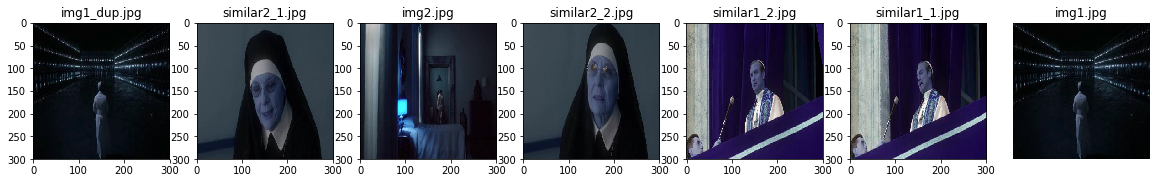

In [17]:
plt.figure(figsize=(20, 10))
i = 0
for img in images:
    plt.subplot(1, len(images), i+1)
    plt.title(imnames[i])
    plt.imshow(images[i])
    i+=1
plt.axis('off')
plt.show()

In [18]:
def add_gaussian_noise(image, mean=0, var=0.1):
    image = np.array(image)
    row,col,ch= image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    return noisy.astype(image.dtype)

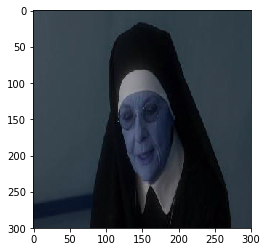

In [19]:
noisy_img = add_gaussian_noise(images[1], var=0.1)
plt.imshow(noisy_img)

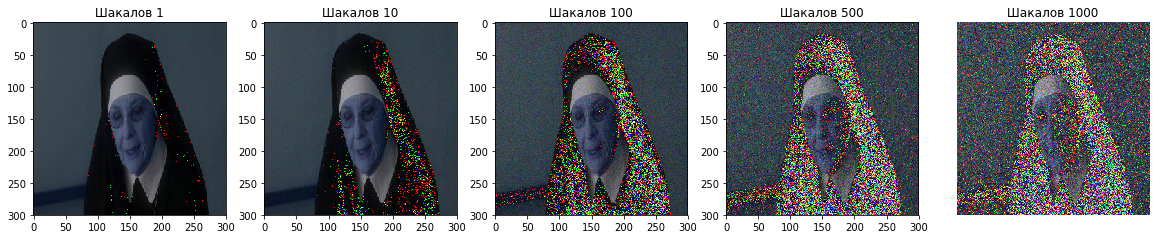

In [20]:
plt.figure(figsize=(20, 10))
img = images[1]
i = 0
variances = [1, 10, 100, 500, 1000]
for var in variances:
    plt.subplot(1, len(variances), i+1)
    plt.title(u'Шакалов '+ str(var))
    plt.imshow(add_gaussian_noise(img,  var=var))
    i+=1
plt.axis('off')
plt.show()

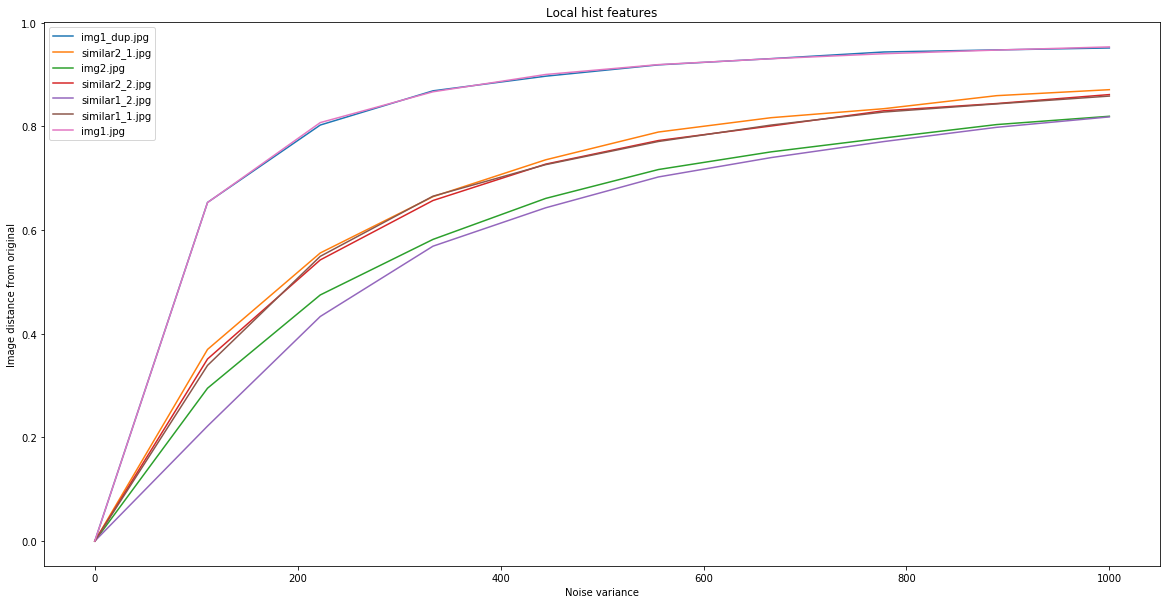

In [21]:
plt.figure(figsize=(20, 10))
variances = np.linspace(0, 1000, 10)
for i, img in enumerate(images):
    original = local_histogram_features(img)
    noisy_pics = [local_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

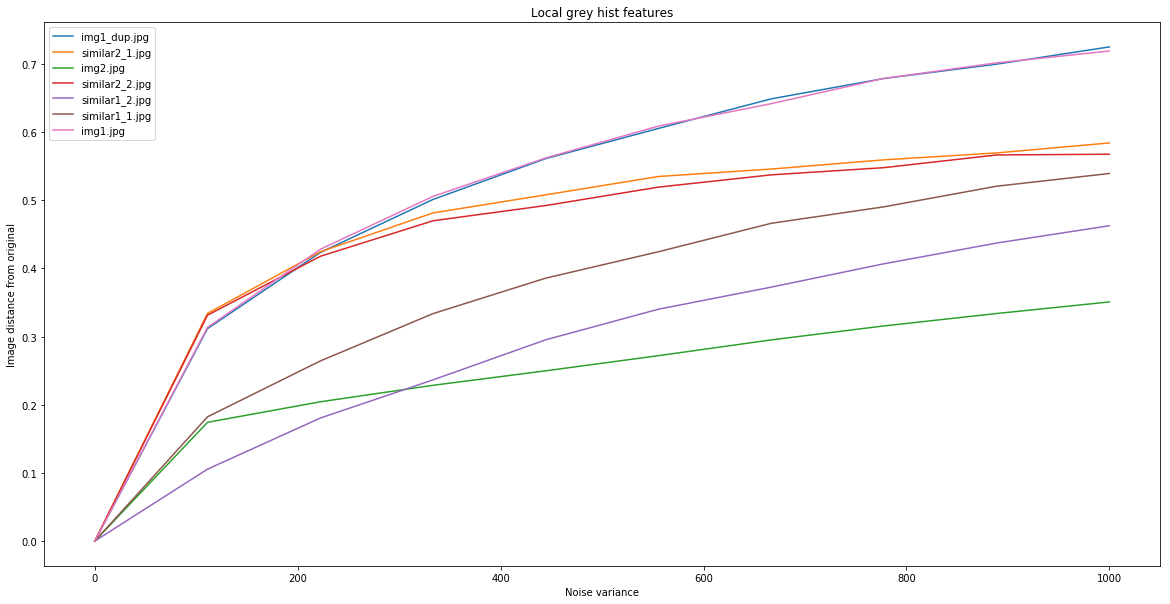

In [22]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = gray_local_histogram_features(img)
    noisy_pics = [gray_local_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Local grey hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

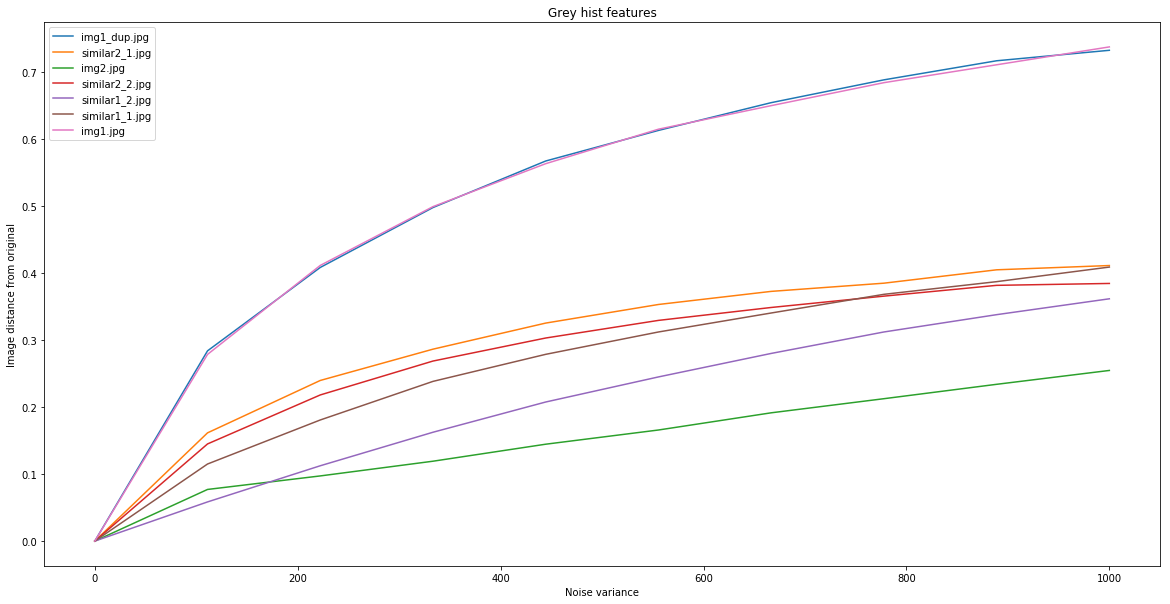

In [23]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = gray_histogram_features(img)
    noisy_pics = [gray_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Grey hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

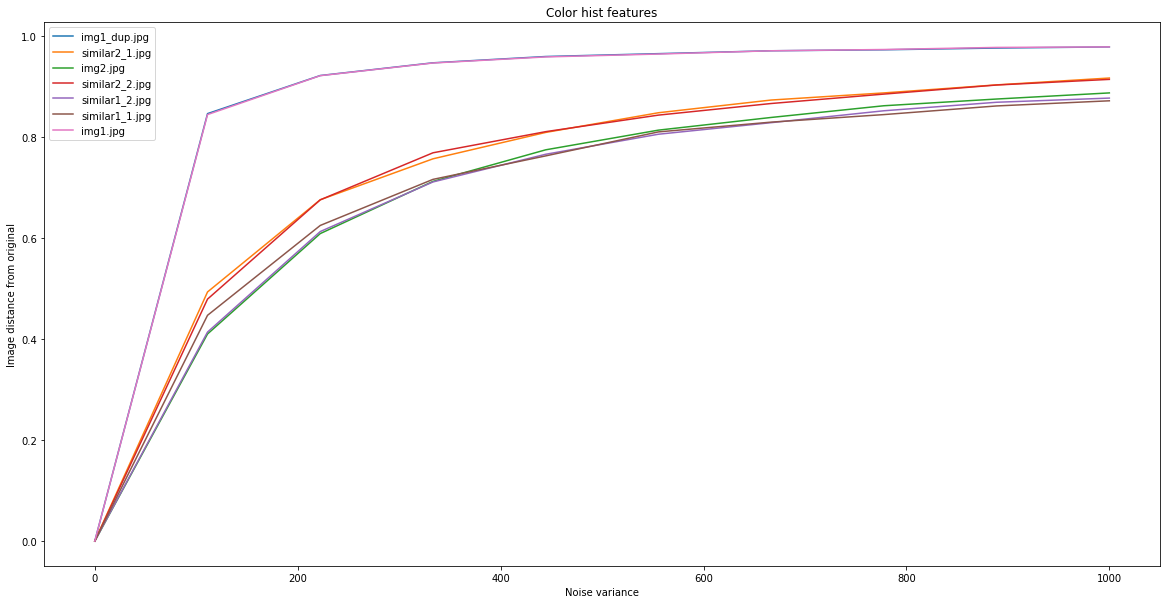

In [24]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = color_histogram_features(img)
    noisy_pics = [color_histogram_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Color hist features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

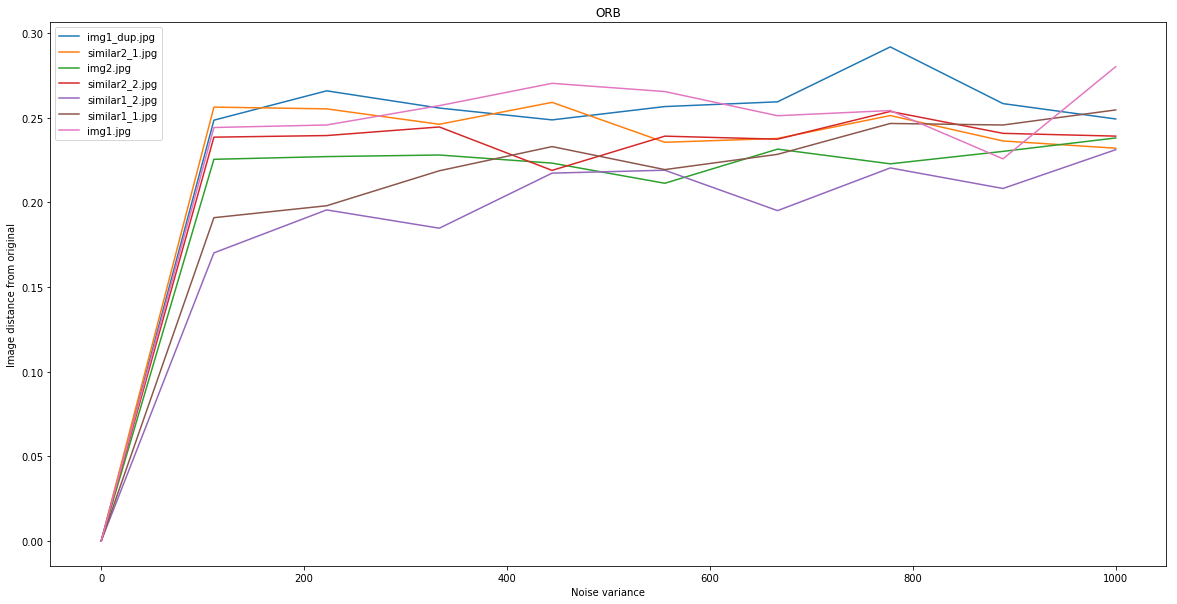

In [25]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = extract_descriptors(img)
    noisy_pics = [extract_descriptors(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('ORB')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

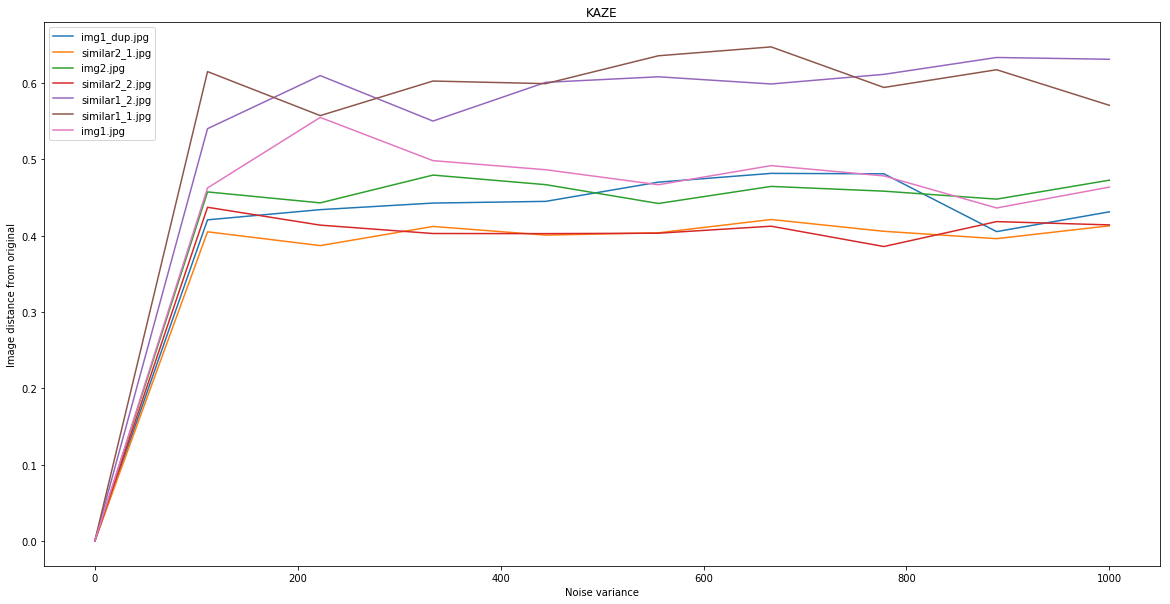

In [26]:
plt.figure(figsize=(20, 10))
for i, img in enumerate(images):
    original = extract_descriptors(img, extractor=cv2.KAZE_create)
    noisy_pics = [extract_descriptors(add_gaussian_noise(img, var=var), extractor=cv2.KAZE_create) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('KAZE')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

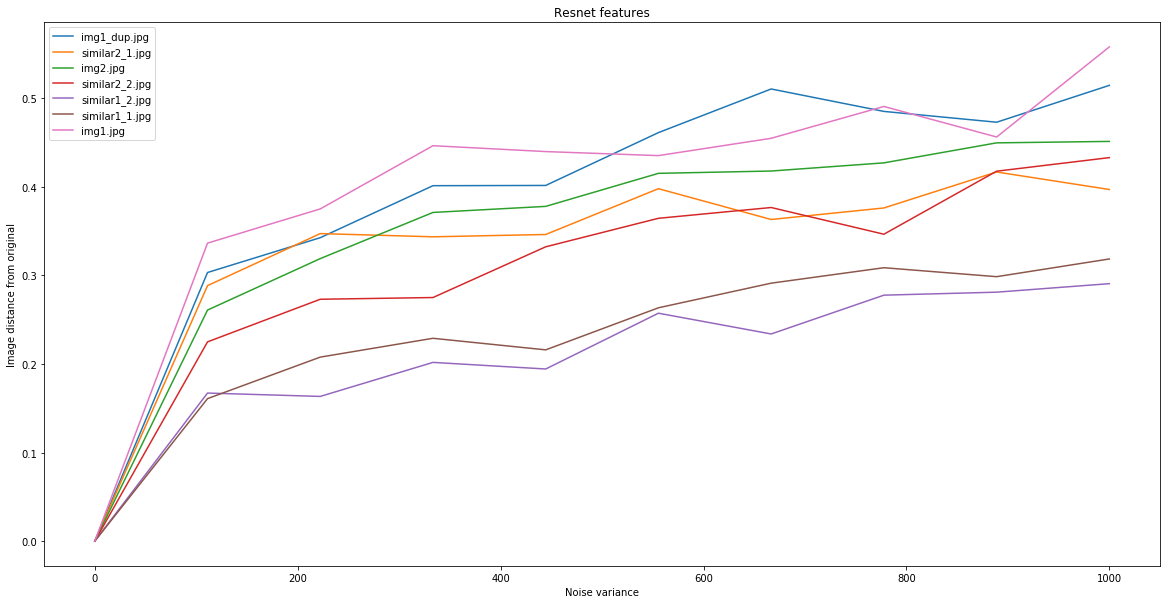

In [27]:
plt.figure(figsize=(20, 10))
variances = np.linspace(0, 1000, 10)
for i, img in enumerate(images):
    original = img_to_vec.resnet_features(img)
    noisy_pics = [img_to_vec.resnet_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Resnet features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

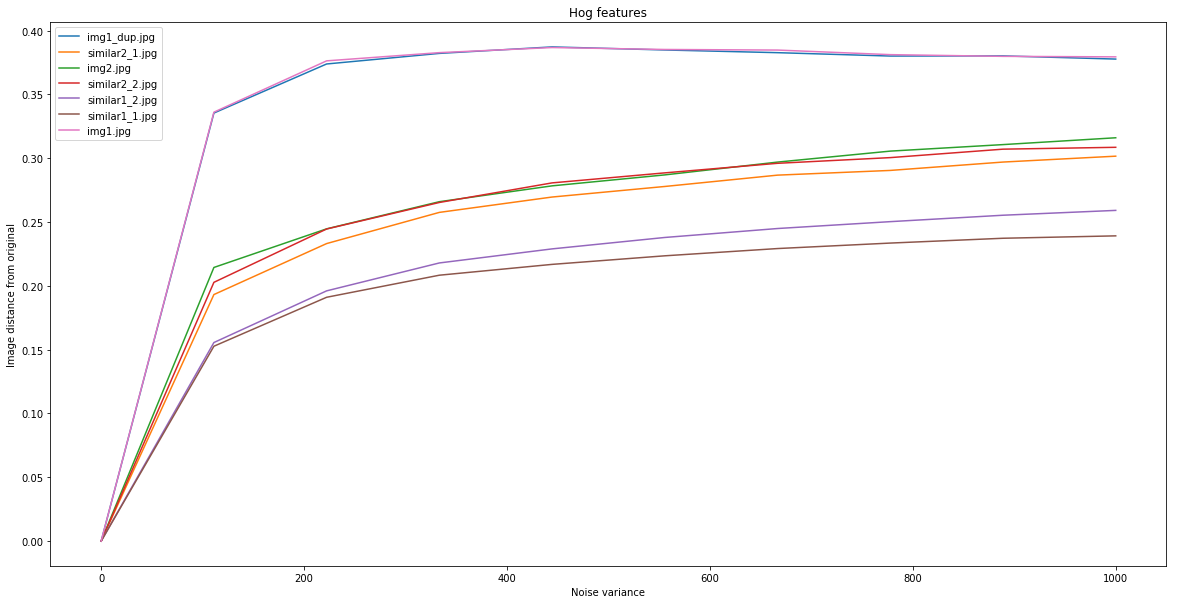

In [28]:
plt.figure(figsize=(20, 10))
variances = np.linspace(0, 1000, 10)
for i, img in enumerate(images):
    original = hog_localhist_features(img)
    noisy_pics = [hog_localhist_features(add_gaussian_noise(img, var=var)) for var in variances]
    distances = scipy.spatial.distance.cdist([original], noisy_pics, metric='cosine').flatten()

    plt.plot(variances, distances, label=imnames[i])
plt.title('Hog features')
plt.ylabel('Image distance from original')
plt.xlabel('Noise variance')
plt.legend()
plt.show()

In [29]:
# Winners: localhist and grey local hist

# Color, contrast, brightness, sharpness

In [37]:
def test_enhancer(enhancer, name):
    plt.figure(figsize=(20, 10))
    factors = np.linspace(0, 1, 7)
    img = images[1]
    img = Image.fromarray(img)
    enh = enhancer(img)
    i = 0
    for f in factors:
        plt.subplot(1, len(factors), i+1)
        plt.title(u'Factor '+ str(round(f, 2)))
        plt.imshow(enh.enhance(f))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    
    factors = np.linspace(1, 0, 20)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        enh = enhancer(pil_pics[i])
        adjusted_pics = [np.array(enh.enhance(factor)) for factor in factors]
        vectors = [local_histogram_features(img) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Enhance factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = hog_localhist_features(img)
        enh = enhancer(pil_pics[i])
        adjusted_pics = [np.array(enh.enhance(factor)) for factor in factors]
        vectors = [hog_localhist_features(img) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Enhance factor')
    plt.legend()
    plt.show()

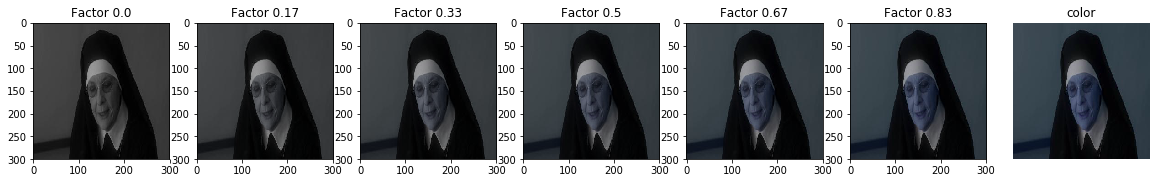

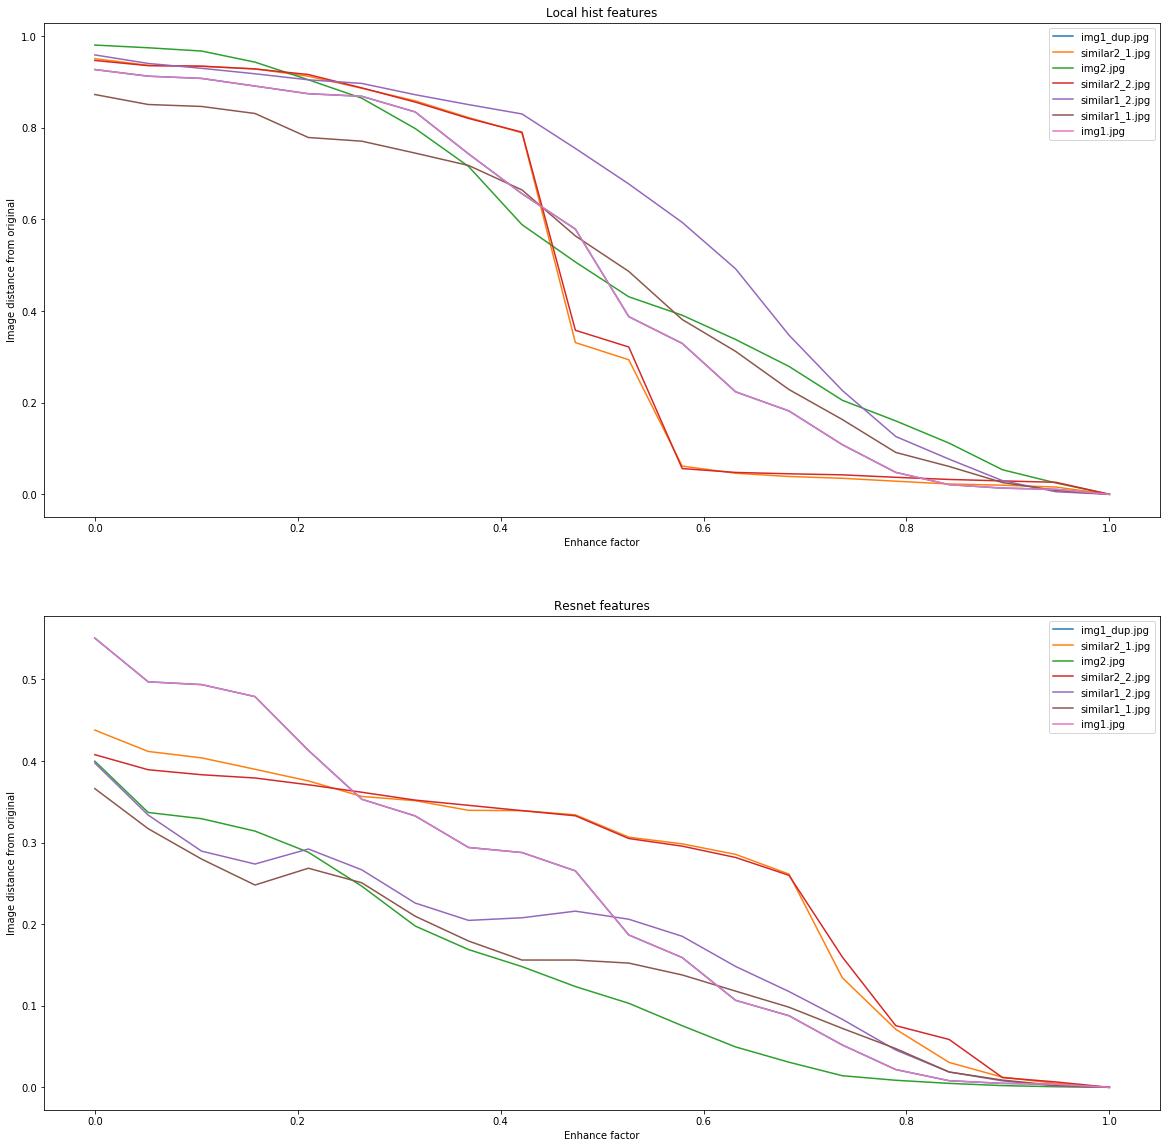

In [38]:
test_enhancer(ImageEnhance.Color, 'color')

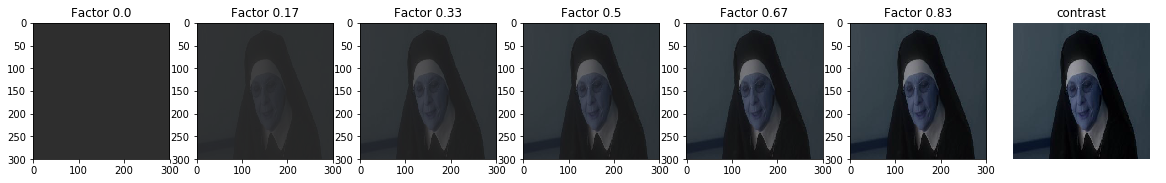

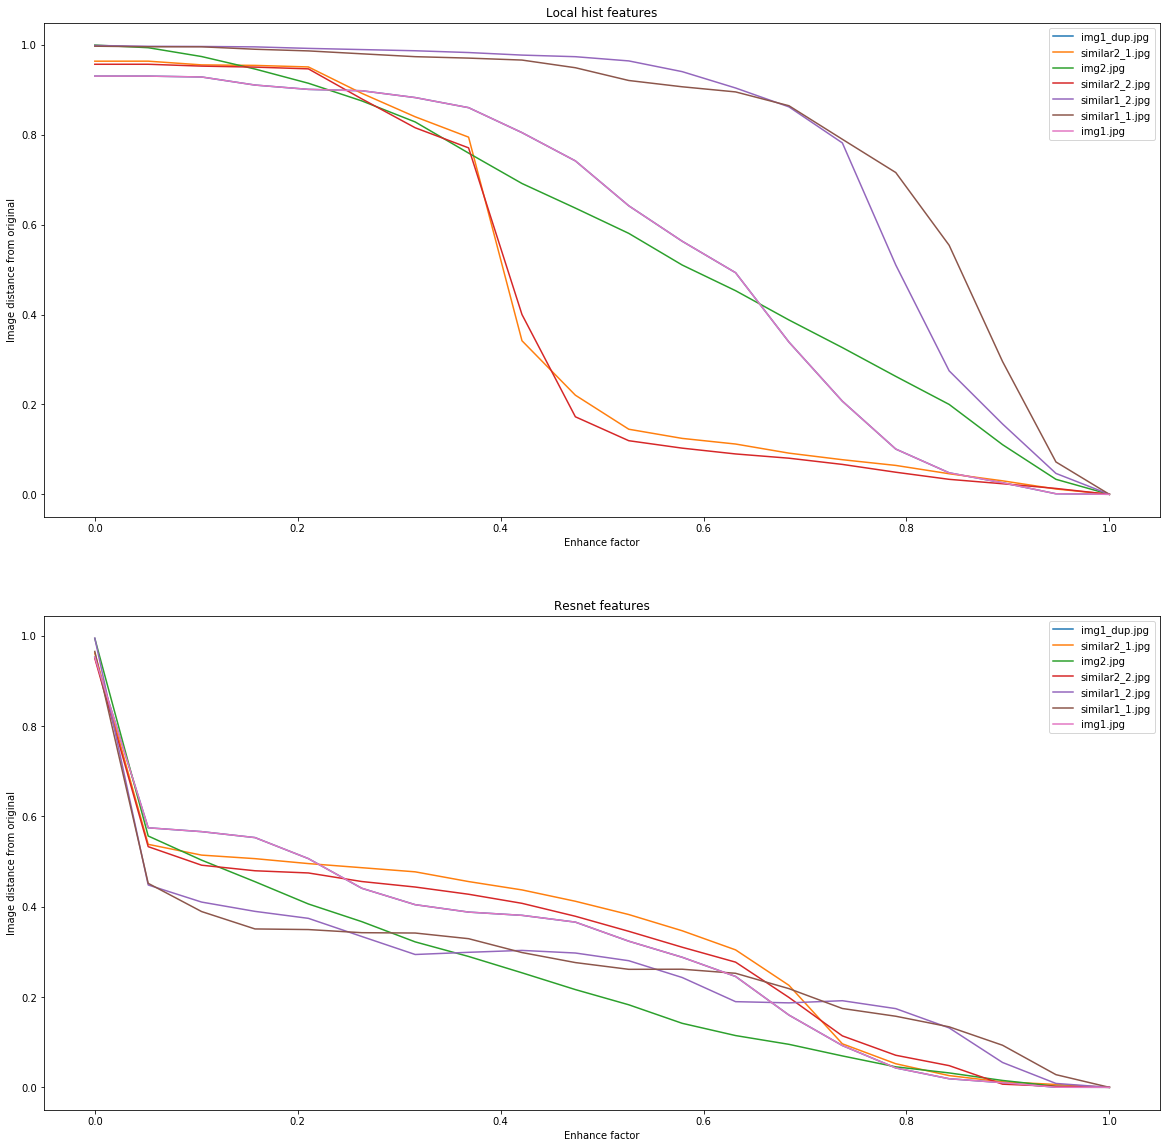

In [39]:
test_enhancer(ImageEnhance.Contrast, 'contrast')

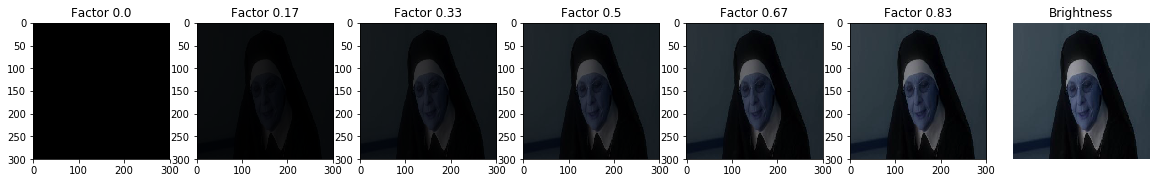

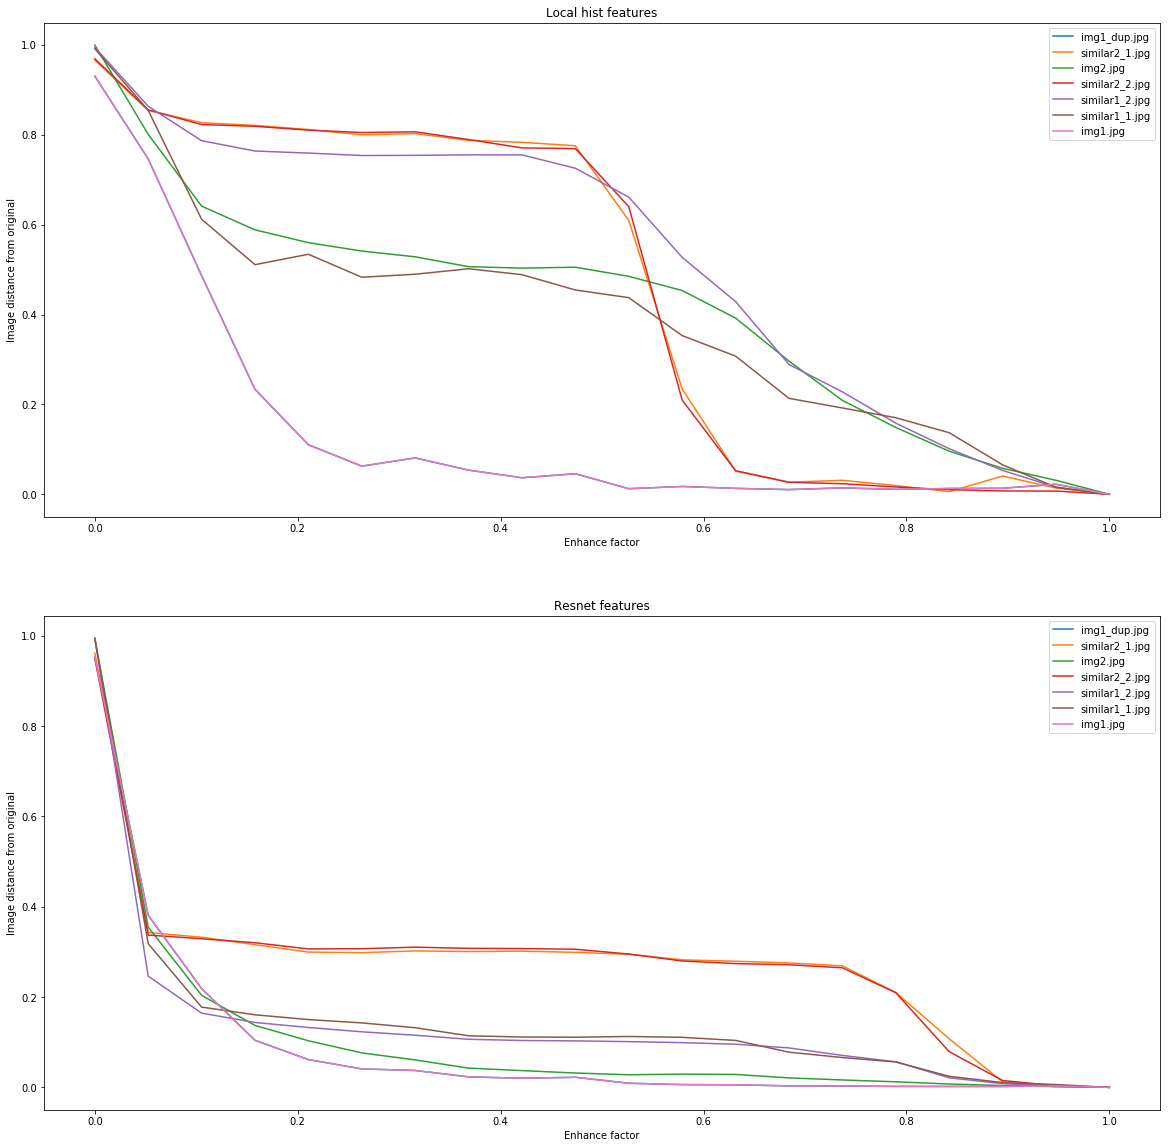

In [40]:
test_enhancer(ImageEnhance.Brightness, 'Brightness')

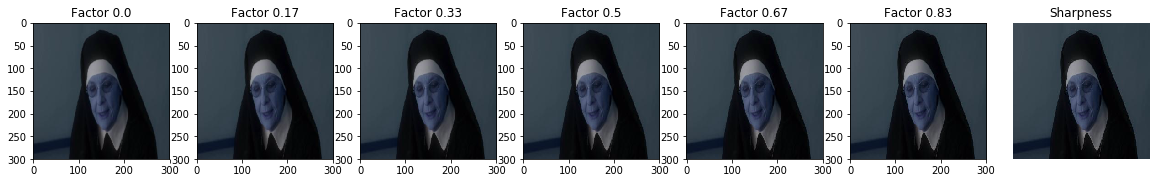

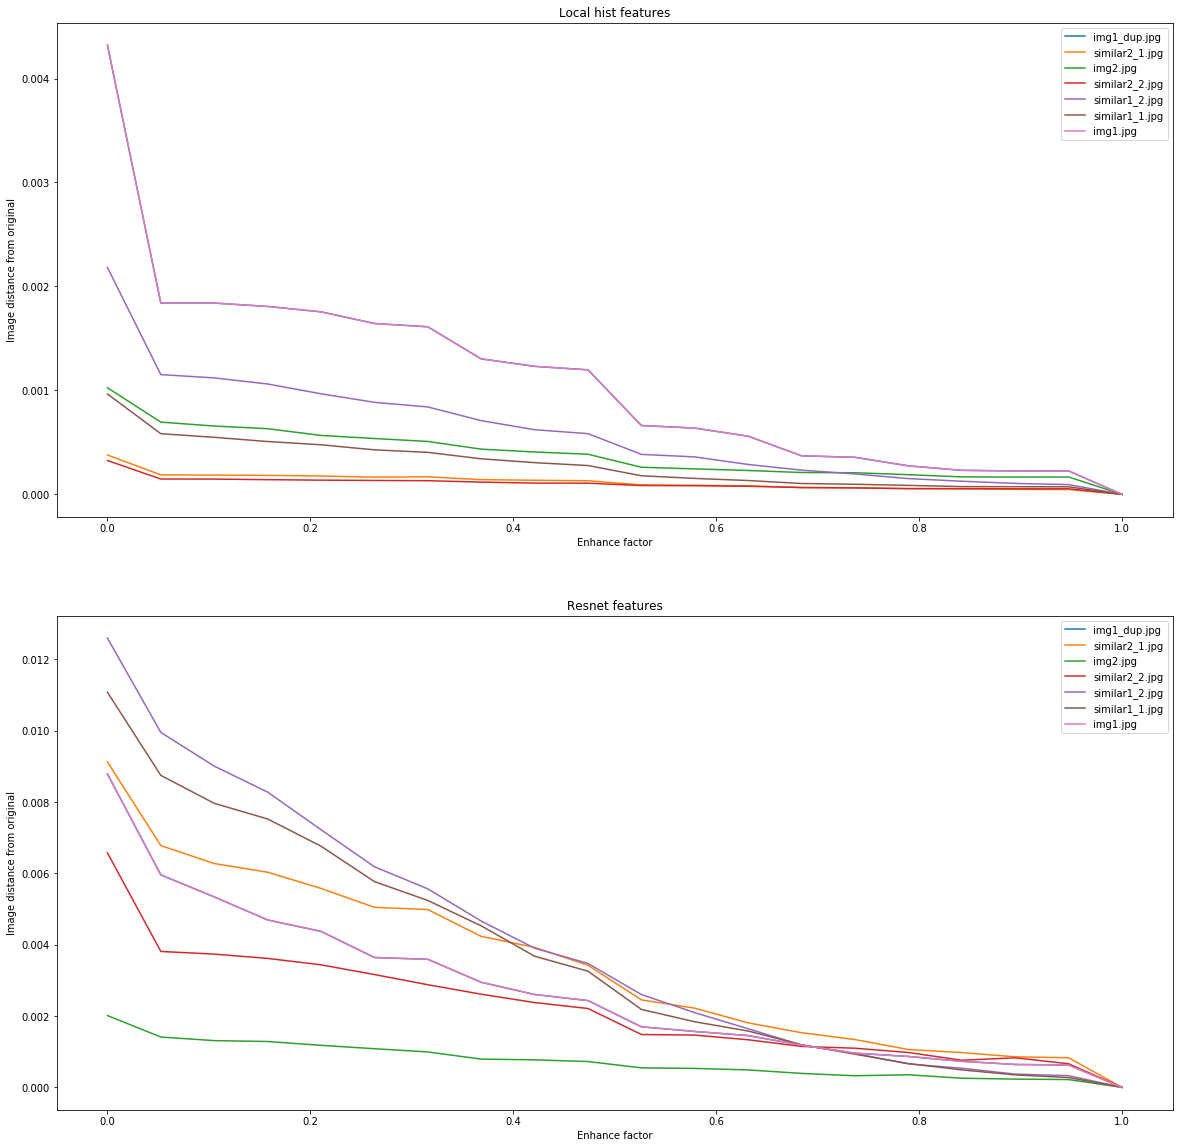

In [41]:
test_enhancer(ImageEnhance.Sharpness, 'Sharpness')

# Blur

Gaussian Blur


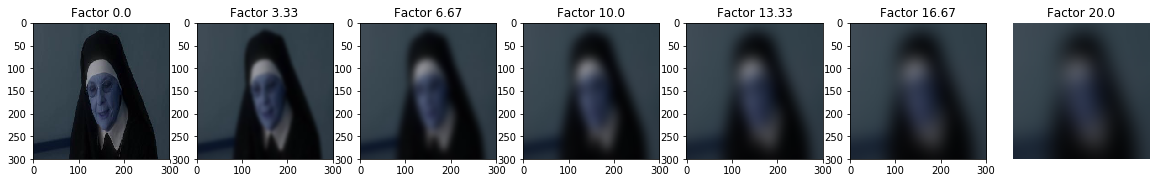

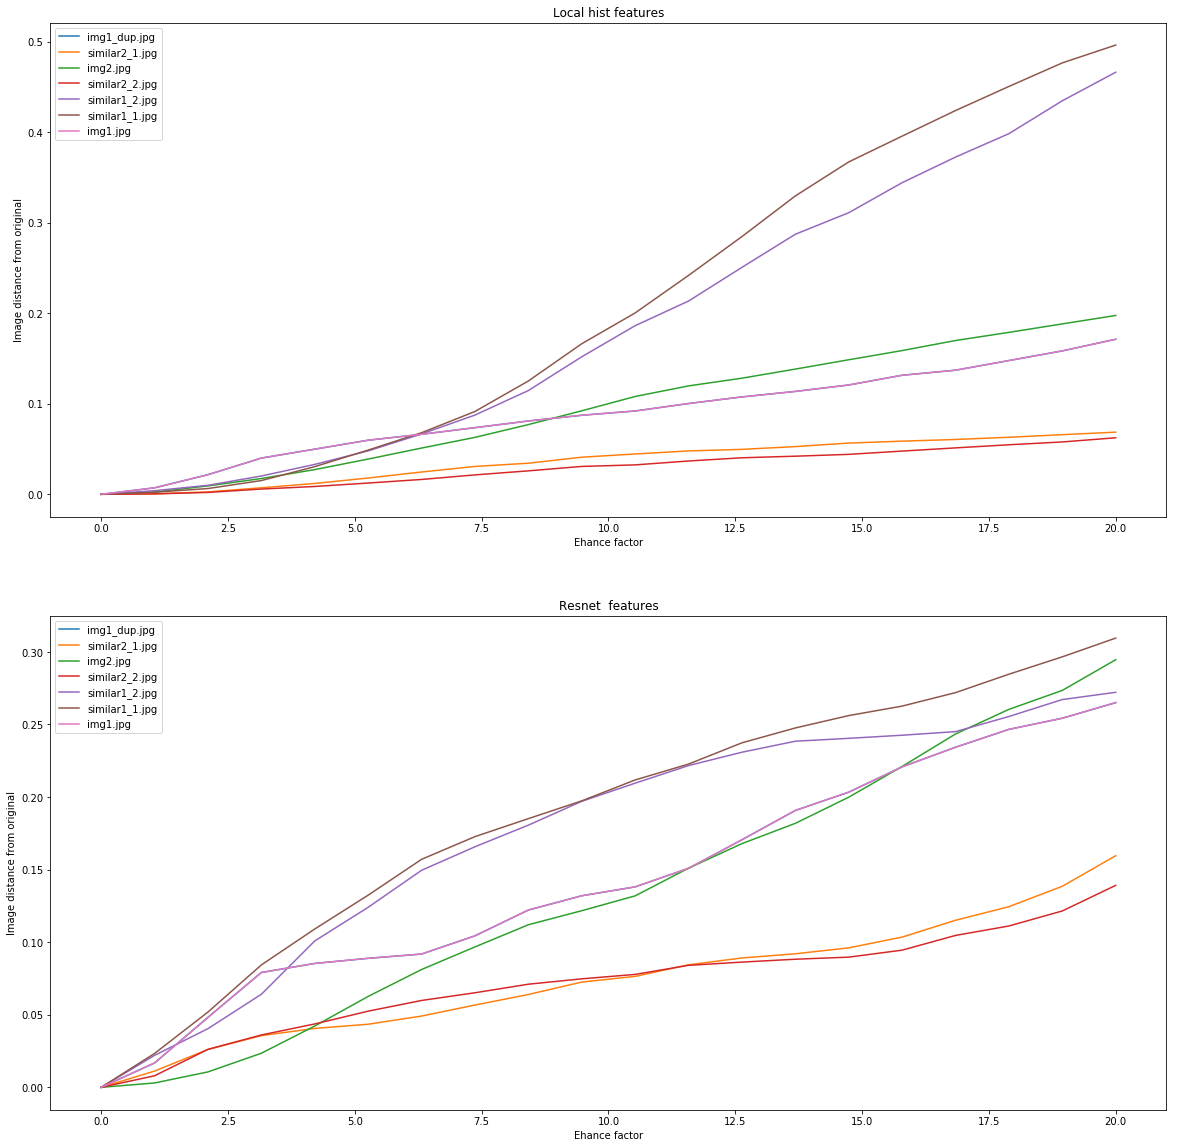

In [42]:
def test_filter(name):
    print(name)
    plt.figure(figsize=(20, 10))
    factors = np.linspace(0, 20, 7)
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for f in factors:
        plt.subplot(1, len(factors), i+1)
        plt.title(u'Factor '+ str(round(f, 2)))
        plt.imshow(img.filter(ImageFilter.GaussianBlur(radius=f)))
        i+=1
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    
    factors = np.linspace(0, 20, 20)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        adjusted_pics = [Image.fromarray(img).filter(ImageFilter.GaussianBlur(radius=factor)) for factor in factors]
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Ehance factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = hog_localhist_features(img)
        adjusted_pics = [Image.fromarray(img).filter(ImageFilter.GaussianBlur(radius=factor)) for factor in factors]
        vectors = [hog_localhist_features(np.array(img)) for img in adjusted_pics]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet  features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Ehance factor')
    plt.legend()
    plt.show()
test_filter('Gaussian Blur')

In [43]:
def test_img_corruption(name, corrupt, factors, display_factors):
    plt.figure(figsize=(20, 10))
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for factor in display_factors:
        plt.subplot(1, len(display_factors), i+1)
        plt.title(u'Factor '+ str(round(factor, 2)))
        plt.imshow(corrupt(img, factor))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    adjusted_pics = []
    for i, img in enumerate(pil_pics):
        adjusted_pics.append([corrupt(img, factor) for factor in factors])
        
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(img)
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = hog_features(img)
        vectors = [hog_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()
    plt.show()

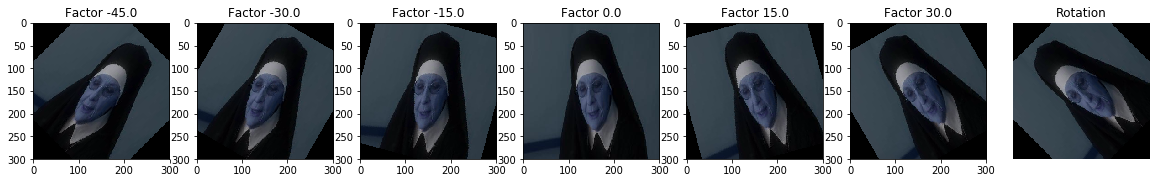

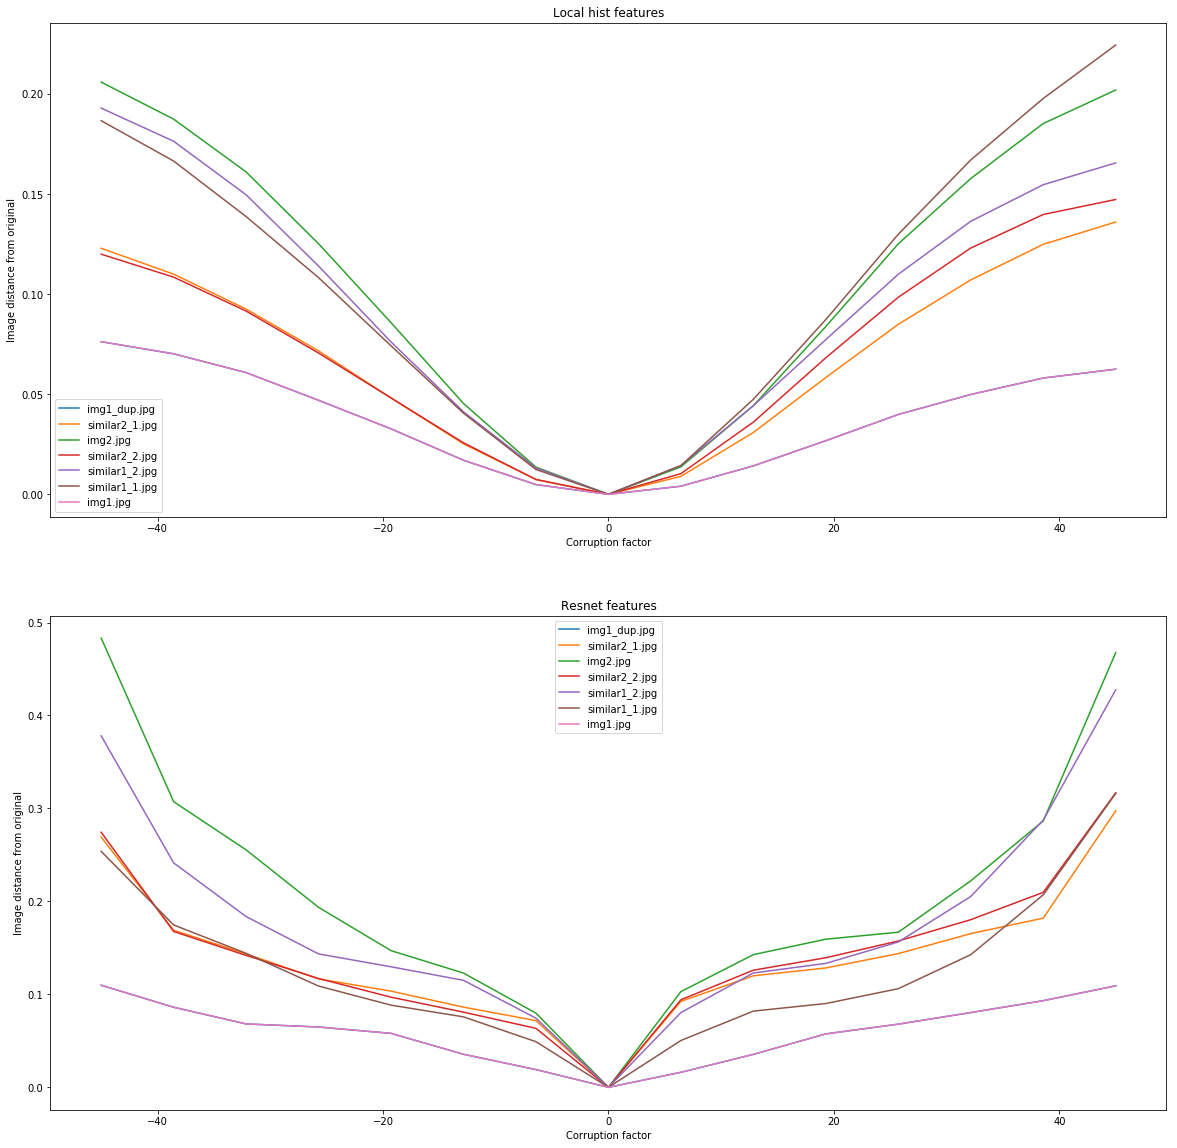

In [44]:
def corrupt_rotate(img, degree):
    return img.rotate(degree)

degrees = np.linspace(-45, 45, 15)
display_degrees = np.linspace(-45, 45, 7)
test_img_corruption('Rotation', corrupt_rotate, degrees, display_degrees)

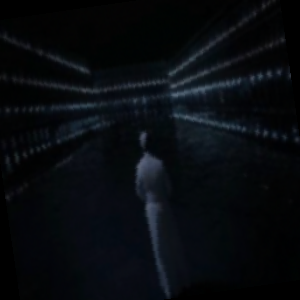

In [45]:
random_corrupt(Image.fromarray(images[0]))

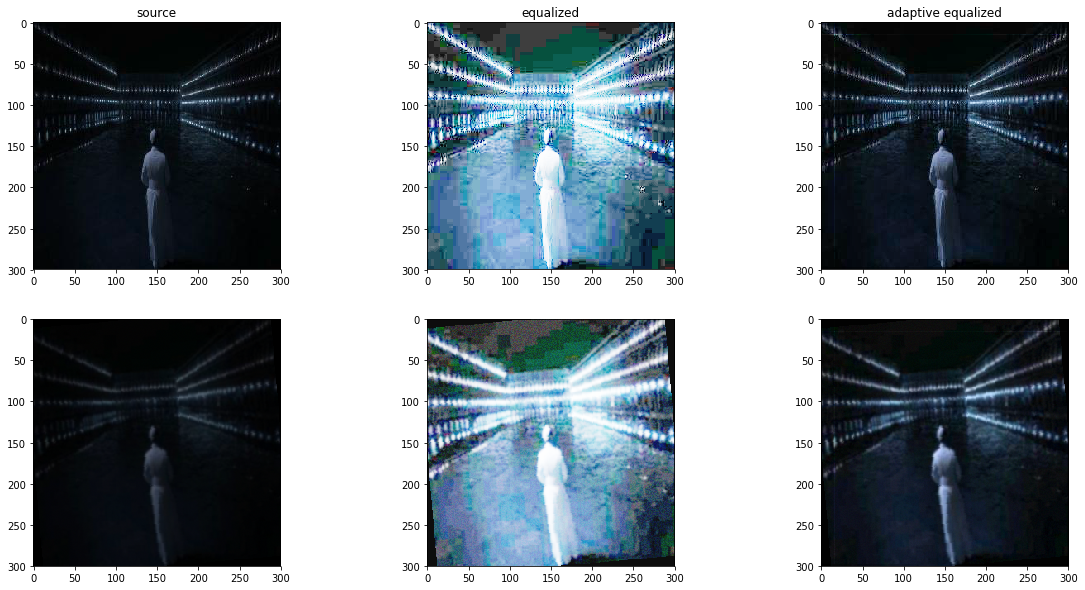

In [46]:
img_i = 0
plt.figure(figsize=(20,10))
source = images[img_i]
equalized_source = exposure.equalize_hist(source)
adap_equalized_source = exposure.equalize_adapthist(source)

corrupted = np.array(random_corrupt(pil_images[img_i]))
equalized_corrupted = exposure.equalize_hist(corrupted)
adap_equalized_corrupted = exposure.equalize_adapthist(corrupted)

plt.subplot(2, 3, 1)
plt.title('source')
plt.imshow(source)
plt.subplot(2, 3, 2)
plt.title('equalized')
plt.imshow(equalized_source)
plt.subplot(2, 3, 3)
plt.title('adaptive equalized')
plt.imshow(adap_equalized_source)

plt.subplot(2, 3, 4)
plt.imshow(corrupted)
plt.subplot(2, 3, 5)
plt.imshow(equalized_corrupted)
plt.subplot(2, 3, 6)
plt.imshow(adap_equalized_corrupted)

In [47]:
def test_img_corruption_restoration(name, preprocess, corrupt, factors, display_factors):
    plt.figure(figsize=(20, 10))
    img = images[1]
    img = Image.fromarray(img)
    i = 0
    for factor in display_factors:
        plt.subplot(1, len(display_factors), i+1)
        plt.title(u'Factor '+ str(round(factor, 2)))
        plt.imshow(corrupt(img, factor))
        i+=1
    plt.title(name)
    plt.axis('off')
    plt.show()
    
    pil_pics = [Image.fromarray(img) for img in images]
    adjusted_pics = []
    for i, img in enumerate(pil_pics):
        adjusted_pics.append([corrupt(img, factor) for factor in factors])
        
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    for i, img in enumerate(images):
        original_vector = local_histogram_features(preprocess(img))
        vectors = [local_histogram_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Local hist features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()

    plt.subplot(2, 1, 2)
    for i, img in enumerate(images):
        original_vector = hog_localhist_features(preprocess(img))
        vectors = [hog_localhist_features(np.array(img)) for img in adjusted_pics[i]]
        distances = scipy.spatial.distance.cdist([original_vector], vectors, metric='cosine').flatten()
        plt.plot(factors, distances, label=imnames[i])
    plt.title('Resnet features')
    plt.ylabel('Image distance from original')
    plt.xlabel('Corruption factor')
    plt.legend()
    plt.show()

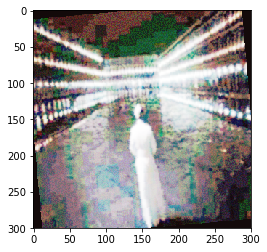

In [48]:
plt.imshow(restore_image(Image.fromarray(corrupted)))

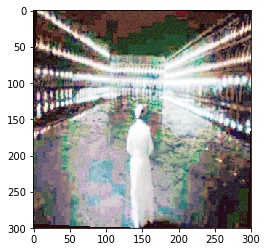

In [49]:
def corrupt_and_restore(img, factor):
    corrupted = random_corrupt(img)
    restored = preprocess_image_load(corrupted)
    return restored

plt.imshow(corrupt_and_restore(pil_images[0], 0.5))

In [50]:
def prep(image):
    image = exposure.equalize_hist(np.array(image))
    return skimage.img_as_ubyte(image)

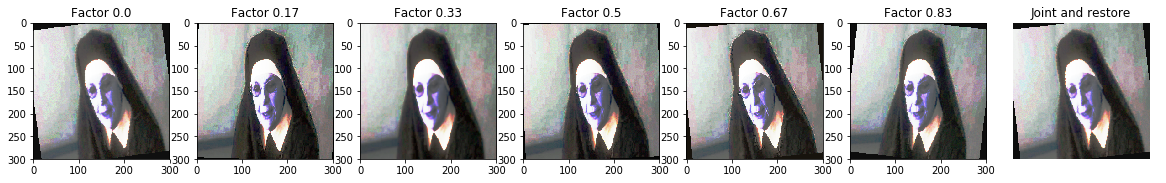

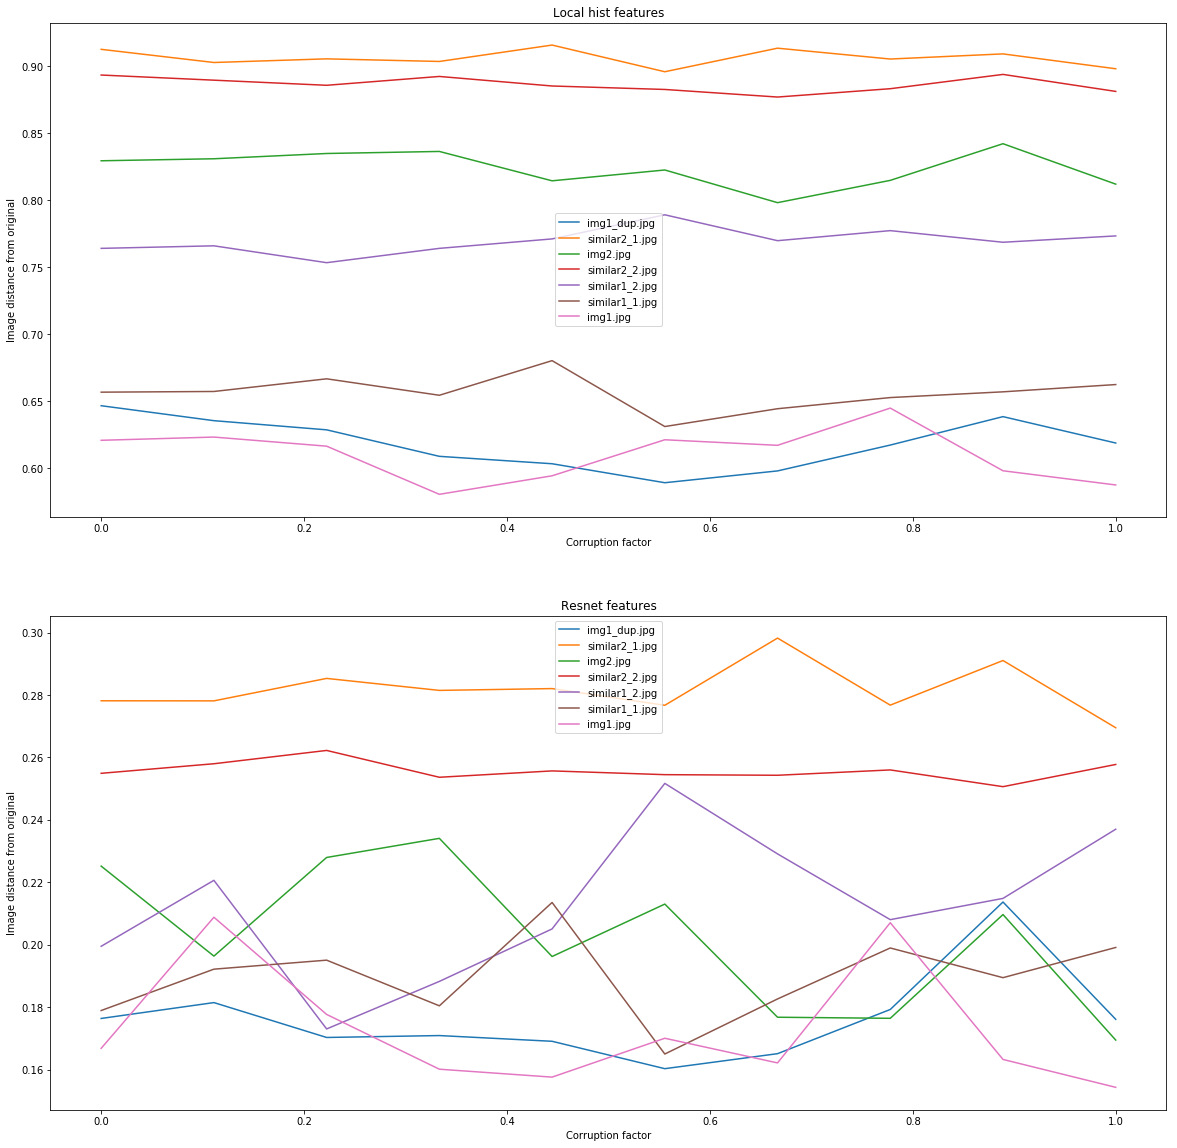

In [51]:
factors = np.linspace(0, 1, 10)
factors_display = np.linspace(0, 1, 7)
test_img_corruption_restoration('Joint and restore', prep, corrupt_and_restore, factors, factors_display)